In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Using TensorFlow backend.


In [2]:
data = []
labels = []
classes = 3
cur_path = os.getcwd()
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'Cars',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [3]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


(16, 30, 30, 3) (16,)
(12, 30, 30, 3) (4, 30, 30, 3) (12,) (4,)


In [4]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [5]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Train on 12 samples, validate on 4 samples
Epoch 1/15
12/12 [==============================] - 0s 35ms/step - loss: 86.3463 - accuracy: 0.0000e+00 - val_loss: 6.4484 - val_accuracy: 0.2500
Epoch 2/15
12/12 [==============================] - 0s 5ms/step - loss: 11.1318 - accuracy: 0.3333 - val_loss: 7.9376 - val_accuracy: 0.2500
Epoch 3/15
12/12 [==============================] - 0s 5ms/step - loss: 11.2071 - accuracy: 0.3333 - val_loss: 8.2259 - val_accuracy: 0.2500
Epoch 4/15
12/12 [==============================] - 0s 3ms/step - loss: 11.5773 - accuracy: 0.5000 - val_loss: 4.7330 - val_accuracy: 0.2500
Epoch 5/15
12/12 [==============================] - 0s 5ms/step - loss: 11.1766 - accuracy: 0.5000 - val_loss: 3.8247 - val_accuracy: 0.2500
Epoch 6/15
12/12 [==============================] - 0s 4ms/step - loss: 16.2222 - accuracy: 0.1667 - val_loss: 1.4068 - val_accuracy: 0.2500
Epoch 7/15
12/12 [==============================] - 0s 4ms/step - loss: 11.2190 - accuracy: 0.3333 - val_l

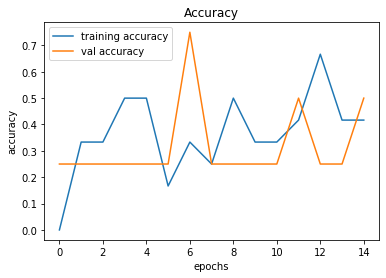

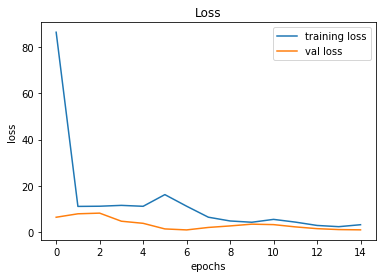

In [6]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
